Treinamento do modelo baseado em árvore de decisão

In [1]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

scaler = StandardScaler()

mnist = load_digits()
X, y = scaler.fit_transform(mnist.data), mnist.target
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param, verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Melhores hiperparâmetros: {best_params}')

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Imprimir a precisão da Decision Tree
print("Precisão:", best_clf.score(X_test, y_test))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Melhores hiperparâmetros: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Precisão: 0.8462962962962963


Avaliação dos ganhos com a utilização de modelos Ensemble

In [7]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()

mnist = load_digits()
X, y = scaler.fit_transform(mnist.data), mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Adaboost
ada_clf = AdaBoostClassifier(n_estimators=50, algorithm='SAMME',random_state=42)
ada_clf.fit(X_train, y_train)

#XGBoost
xgb_clf = XGBClassifier(n_estimators=50, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train)

#Random Forest
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)
rf_clf.fit(X_train, y_train)

#Enseble
voting_clf = VotingClassifier(
    estimators=[
        ('ada', ada_clf),
        ('xgb', xgb_clf),
        ('rf', rf_clf)
    ],
    voting='hard'
)

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Ensemble model: {accuracy:.4f}')


Accuracy of Ensemble model: 0.9648


Visualização da árvore de decisão e Medida de Impureza

Precisão: 0.6611


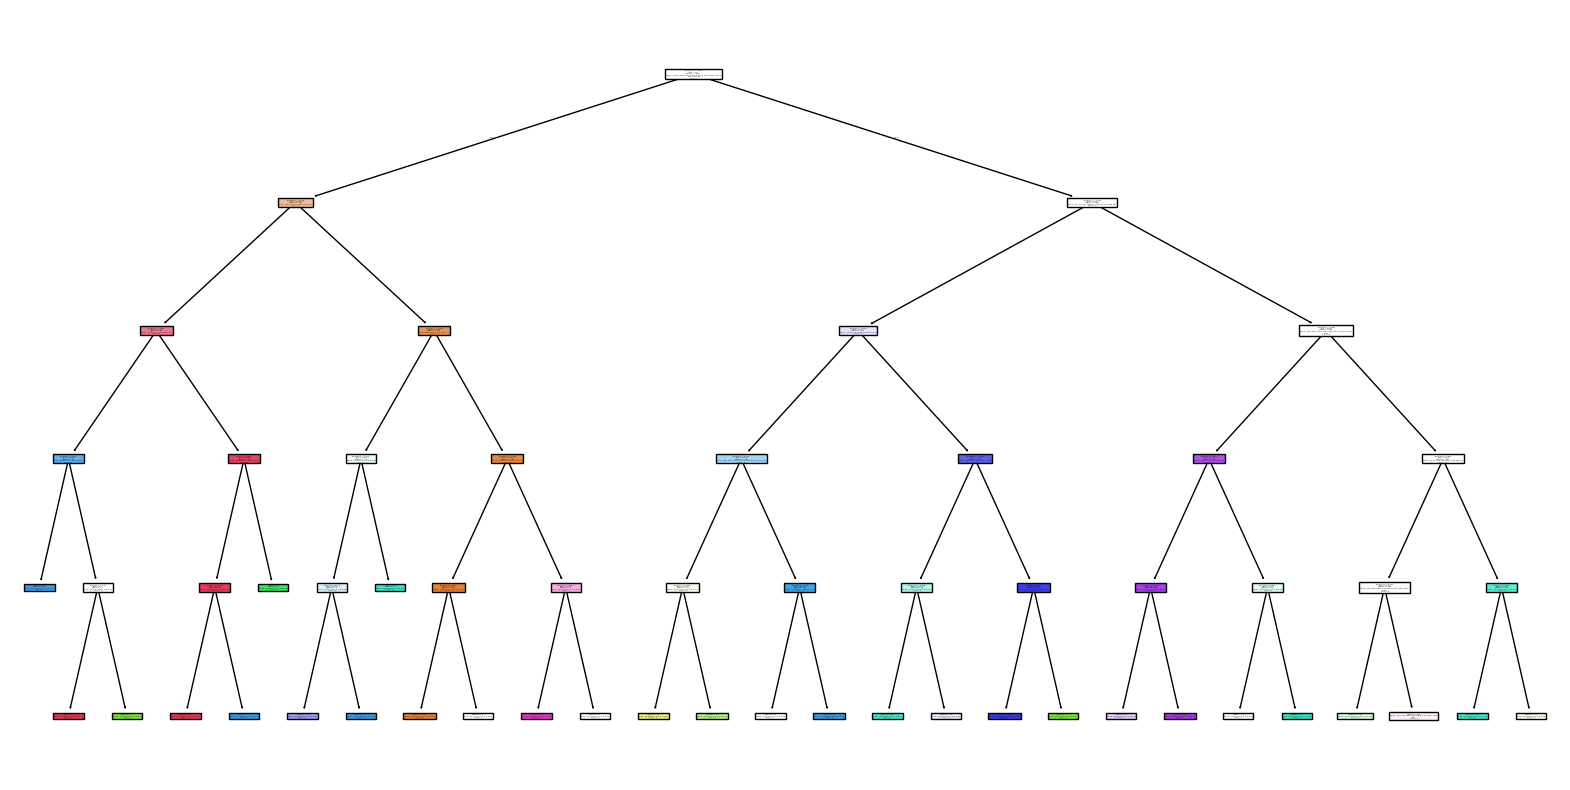

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados load_digits
digits = load_digits()

# Padronizar os dados
scaler = StandardScaler()
X, y = scaler.fit_transform(digits.data), digits.target

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar a árvore de decisão
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisão: {accuracy:.4f}')

# Visualizar a árvore de decisão usando Matplotlib
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=[f'pixel_{i}' for i in range(X.shape[1])], class_names=[str(i) for i in range(10)])
plt.show()


In [9]:
import numpy as np

# Função para calcular a impureza de Gini
def gini_impurity(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    return 1 - np.sum(probabilities ** 2)

# Função para calcular a entropia
def entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    return -np.sum(probabilities * np.log2(probabilities))

# Exemplo de conjuntos de rótulos
labels_example_1 = [0, 0, 1, 1, 1, 0, 0, 0]  # Mais homogêneo
labels_example_2 = [0, 1, 0, 1, 0, 1, 0, 1]  # Menos homogêneo

print(f'Gini Impurity (Example 1): {gini_impurity(labels_example_1):.4f}')
print(f'Entropy (Example 1): {entropy(labels_example_1):.4f}')

print(f'Gini Impurity (Example 2): {gini_impurity(labels_example_2):.4f}')
print(f'Entropy (Example 2): {entropy(labels_example_2):.4f}')


Gini Impurity (Example 1): 0.4688
Entropy (Example 1): 0.9544
Gini Impurity (Example 2): 0.5000
Entropy (Example 2): 1.0000


In [10]:
# Treinar a árvore de decisão com poda
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)

# Avaliar o desempenho do modelo no conjunto de teste
accuracy = clf.score(X_test, y_test)
print(f'Accuracy after pruning: {accuracy:.4f}')

Accuracy after pruning: 0.6667


In [11]:
import joblib

model_path = 'models/model.pkl'
joblib.dump(voting_clf, model_path)

['models/model.pkl']